In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load Iris Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
# Basic Exploration
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df['target'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset shape: (150, 5)

Class distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
#  Select features
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply PCA (retain all components)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

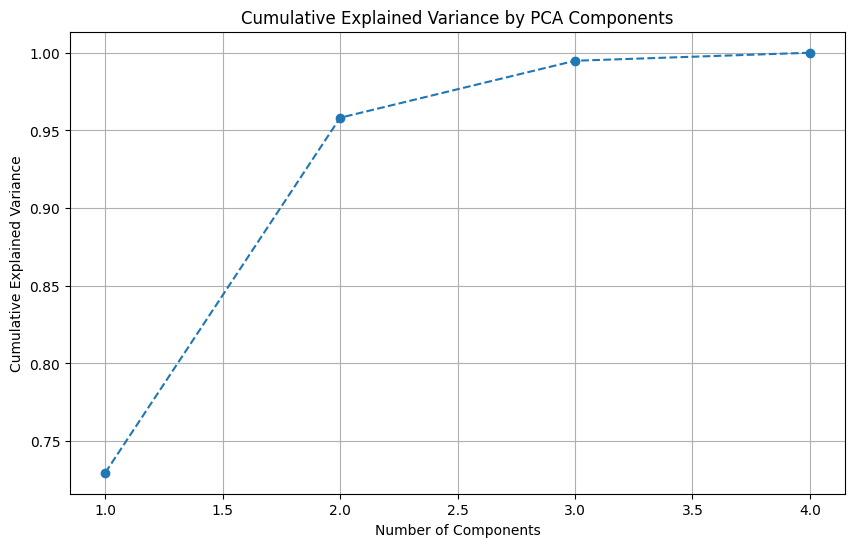

In [7]:
# Explained Variance Plot
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [8]:
# Reduce to 2 Components for Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

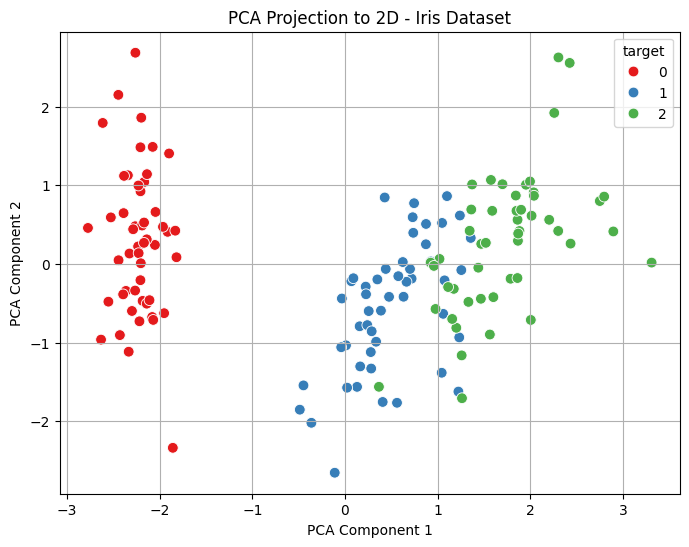

In [9]:
# Visualize 2D PCA Result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='Set1', s=60)
plt.title('PCA Projection to 2D - Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [10]:
#  Show PCA Loadings
loadings = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print("\nPCA Loadings (Feature contributions to each PC):\n")
print(loadings.round(3))


PCA Loadings (Feature contributions to each PC):

                     PC1    PC2
sepal length (cm)  0.521  0.377
sepal width (cm)  -0.269  0.923
petal length (cm)  0.580  0.024
petal width (cm)   0.565  0.067
